# Scikit-Learn 
See  http://scikit-learn.org/stable/index.html

Built on NumPy, SciPy, and Matplotlib
“De facto official Python general machine learning framework”


In [1]:
import sklearn

# Project Overview:
- Team: familiar neuroimagers -(Gael / Sartra / Chris etc.)    http://scikit-learn.org/stable/about.html#citing-scikit-learn
- Now, 1000 contributers, 13,000 forks, 25,000 "stars"
- new version every 4-5 months  0.20 under dev
- Core techniques, hundreds of options for:
    - Classification 
    - Regression 
    - Clustering 
    - Dimensionality Reduction 
    - Model Selection 
    - Preprocessing

An attractive feature of Scikit-Learn is its generic [API](http://scikit-learn.org/stable/modules/classes.html)

Very well documented:  [Documentation](https://scikit-learn.org/stable/documentation.html)
    

# Supervised Learning

Many [supervised learning](http://scikit-learn.org/stable/supervised_learning.html) tools, using standardised API.

- Generalized Linear Models
- Linear and Quadratic Discriminant Analysis
- Kernel ridge regression
- Support Vector Machines
- Stochastic Gradient Descent
- Nearest Neighbors
- Gaussian Processes
- Cross decomposition
- Naive Bayes
- Decision Trees
- Ensemble methods
- Multiclass and multilabel algorithms
- Feature selection
- Semi-Supervised
- Isotonic regression
- Probability calibration



In [2]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Load digits test dataset:

In [3]:
from sklearn import datasets
digits = datasets.load_digits()
digits.data.shape

(1797, 64)

In [4]:
import numpy as np
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:

def plot_gallery(data, labels, shape, interpolation='nearest'):
    for i in range(data.shape[0]):
        plt.subplot(1, data.shape[0], (i + 1))
        plt.imshow(data[i].reshape(shape), interpolation=interpolation)
        plt.title(labels[i])
        plt.xticks(()), plt.yticks(())

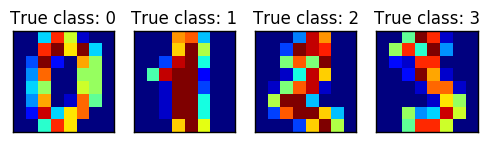

In [7]:
images = digits.data[:4]
labels = ['True class: %d' % l for l in (np.arange(4))]
plot_gallery(images, labels, shape=(8, 8))

Fitting data..

In [8]:
clf.fit(digits.data[:-1], digits.target[:-1])  

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Prediction..

In [9]:
clf.predict(digits.data[-1:])

array([8])

# Model Selection and evaluation

e.g.
- Cross-validation: evaluating estimator performance
- Tuning the hyper-parameters of an estimator
- Model evaluation: quantifying the quality of predictions
- Validation curves: plotting scores to evaluate models


## Cross validation:


In [10]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, digits.data, digits.target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))  

Accuracy: 0.95 (+/- 0.04)


Try LDA:

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
scores = cross_val_score(clf, digits.data, digits.target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) 

Accuracy: 0.91 (+/- 0.05)


/usr/local/fsl/fslpython/envs/fslpython/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Many types of [Cross Validation Iterators](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/cross_validation.html)
- K-Fold
- Leave-One-Out
- Leave-One-Label-Out
- etc

Many types of [model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html).


In [12]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

## Grid Search

In [13]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(digits.data, digits.target)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [14]:
clf.cv_results_


{'mean_fit_time': array([ 0.02530042,  0.25320292,  0.02594137,  0.25052571]),
 'mean_score_time': array([ 0.01454631,  0.06761368,  0.01411541,  0.06657036]),
 'mean_test_score': array([ 0.94379521,  0.42125765,  0.94379521,  0.45075125]),
 'mean_train_score': array([ 1.,  1.,  1.,  1.]),
 'param_C': masked_array(data = [1 1 10 10],
              mask = [False False False False],
        fill_value = ?),
 'param_kernel': masked_array(data = ['linear' 'rbf' 'linear' 'rbf'],
              mask = [False False False False],
        fill_value = ?),
 'params': ({'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'}),
 'rank_test_score': array([1, 4, 1, 3], dtype=int32),
 'split0_test_score': array([ 0.93521595,  0.39368771,  0.93521595,  0.42026578]),
 'split0_train_score': array([ 1.,  1.,  1.,  1.]),
 'split1_test_score': array([ 0.95826377,  0.41068447,  0.95826377,  0.43906511]),
 'split1_train_score': array([ 1.,  1.,  

In [15]:
scores = cross_val_score(clf, digits.data, digits.target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) 

Accuracy: 0.95 (+/- 0.04)


# Unsupervised Learning
- Gaussian mixture models
- Manifold learning
- Clustering
- Biclustering
-  Decomposing signals in components (matrix factorization problems)
-  Covariance estimation
-  Novelty and Outlier Detection
- Density Estimation
- Neural network models (unsupervised)

## Matrix factorization 

Various [Decompositon](http://scikit-learn.org/stable/modules/decomposition.html#decompositions) methods available, including:
- PCA
- ICA
- LDA
- NNMF


In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.fit_transform(digits.data)
digits_pca.shape

(1797, 2)

In [17]:
pca.fit_transform??

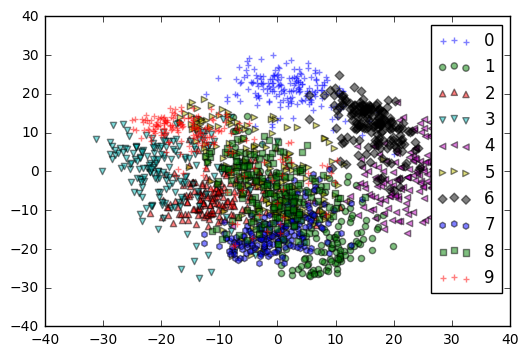

In [18]:
from itertools import cycle

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['+', 'o', '^', 'v', '<', '>', 'D', 'h', 's']
for i, c, m in zip(np.unique(digits.target), cycle(colors), cycle(markers)):
    plt.scatter(digits_pca[digits.target == i, 0], digits_pca[digits.target == i, 1],
        c=c, marker=m, label=i, alpha=0.5)
    
_ = plt.legend(loc='best')

# Clustering

[Many options,](http://scikit-learn.org/stable/modules/clustering.html)  Including:
- KMeans
- Hierarchical
- Spectral
- etc.


In [19]:
from sklearn.cluster import KMeans
digits_kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
digits_kmeans.fit(digits_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
digits_kmeans.labels_.shape

(1797,)

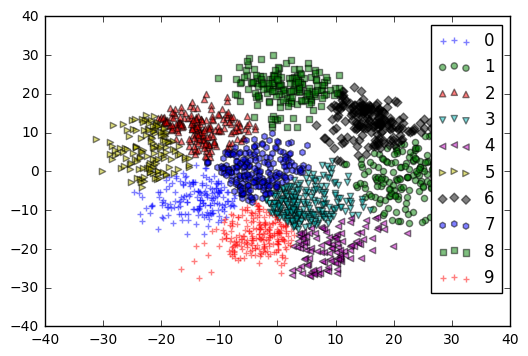

In [21]:

for i, c, m in zip(np.unique(digits_kmeans.labels_), cycle(colors), cycle(markers)):
    plt.scatter(digits_pca[digits_kmeans.labels_ == i, 0], digits_pca[digits_kmeans.labels_ == i, 1],
        c=c, marker=m, label=i, alpha=0.5)
    
_ = plt.legend(loc='best')

In [23]:
from sklearn.metrics import adjusted_mutual_info_score
adjusted_mutual_info_score(digits.target,digits_kmeans.labels_)

0.51958595223162929

## Deep Learning
"Warning This implementation is not intended for large-scale applications. In particular, scikit-learn offers no GPU support. For much faster, GPU-based implementations, as well as frameworks offering much more flexibility to build deep learning architectures, see Related Projects.
"
- [TFLearn](https://tflearn.org)  Tensorflow wrapper with Scikit-Learn like API
- [Keras](https://keras.io)  Keras has Scikit-Learn 


# NiLearn

- [NILearn](https://nilearn.github.io/) Machine learning for Neuro-Imaging in Python


# Performance 

Design not performance   

   ## Big Data
   - some incremental estimators
   - scipy.sparse

    ## Processing
- Some functions implemented using Cython (e.g. libsvm is used)
- joblib.Parallel
- multiprocessing module
-

# Contributing 
